This image is: <class 'numpy.ndarray'> with dimensions: (768, 1024, 3)


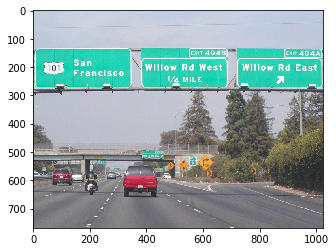

In [4]:
# Do all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

#reading in an image
image = mpimg.imread('Img_input2.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)
plt.show()

In [ ]:
%matplotlib #display images in whatever format they are

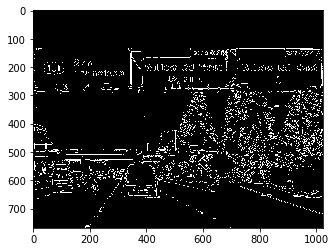

In [5]:
# Read in the jpg image and convert to grayscale using CVT using 0,255 bytescale
image = mpimg.imread('Img_input2.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring with odd number 3,5,7,...
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# calibrate parameters for Canny
low_threshold = 30
high_threshold = 120
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image, this canny image will create borderline for the image set
plt.imshow(edges, cmap='Greys_r')
plt.show()

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


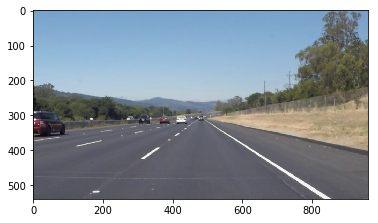

In [6]:
#reading in an image
image = mpimg.imread('solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)
plt.show()

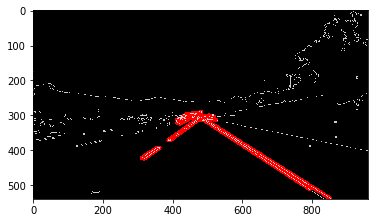

In [7]:
# Similar to previous cell, we perform to get Canny images, then identify the path
# to travel.
image = mpimg.imread('solidWhiteRight.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# create nasked edges or boundary lines
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# create a 4 sided polygon to fill the boundary of the roads.
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Using Hough transform parameters to make blank same size as image
# Calibrate the value of the variables
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank image to overlay.

# Run Hough on edge detected image, gives use the lines with enpoint detected line segments.
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output lines and draw and overlay lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a color binary image to combine with line image generated above
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)

plt.show()
#output:recongnises red boundaries or edges for all obstruction of driverless vehicle path.

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


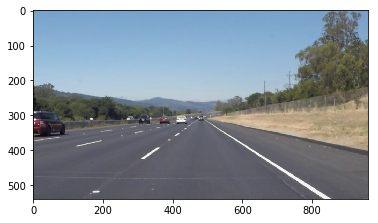

In [6]:
#reading in an image
image = mpimg.imread('solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)
plt.show()
#now apply this concept to video, using moviepy which divides videos into set of image(frames)
#work on frames to apply this algorithm using loop 

In [ ]:
import os
os.listdir("")

In [17]:
import imageio
imageio.plugins.ffmpeg.download()
# Import everything needed to edit/save/watch video clips
from moviepy.editor import movipy

In [20]:
import imageio
imageio.plugins.ffmpeg.download()